 ## PGE 383 HOMEWORK 6

 ### Daniel McAllister-Ou



 Imports :

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
import scipy


 Define Table 1 data:

In [230]:
# Set average reservoir pressure 
Pavg = 408.2 # psia
Test = np.array([1, 2, 3, 4])
Pwf = np.array([403.1,394.0,378.5,362.6]) # psia
qg = np.array([4.288,9.265,15.552,20.177]) # MMscf/d    

Test1_df = pd.DataFrame({'Test': Test, 'Pwf': Pwf, 'qg': qg})
Test1_df.head()



,Test,Pwf,qg
0,1,403.1,4.288
1,2,394.0,9.265
2,3,378.5,15.552
3,4,362.6,20.177


 ### Question 1

 Analyze AOF using empircal deliverablity equation

 - qg = C(Pavg^2 - Pwf^2)



 Theoretical deliverability can be calculated using the formula:

 - Pavg^2 - Pwf^2 = a*qg + b*qg^2

 or

 - (Pavg^2 - Pwf^2)/qg = a + b*qg





In [231]:
gas_drawdown = Pavg**2 - Pwf**2

def empirical_deliverability(drawdown, C):
    return C * drawdown

C_opt, _ = scipy.optimize.curve_fit(empirical_deliverability, gas_drawdown, qg)
C = C_opt[0]
print(f"Estimated deliverability constant (C): {C:.4f} MMscf/d/psia^2")


gas_drawdown_over_qg = (Pavg**2 - Pwf**2)/qg

def theoretical_deliverability(gas_drawdown_over_qg, a, b):
    return b * gas_drawdown_over_qg + a

b, a = np.polyfit(qg, gas_drawdown_over_qg, 1)
print("Theoretical Deliverability Params:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")  


Estimated deliverability constant (C): 0.0006 MMscf/d/psia^2
Theoretical Deliverability Params:
a = 766.2667
b = 48.1665


 Functions for calculating qg from gas drawdown using theoretical and empirical deliverability:

In [232]:
def qg_from_empirical_deliverability(gas_drawdown, C):
    """
    Calculate qg from gas drawdown using the empirical deliverability equation.
    
    Parameters
    ----------
    gas_drawdown : float or array-like
        Gas drawdown (Pavg^2 - Pwf^2)
    C : float
        Deliverability constant from empirical fit
    
    Returns
    -------
    qg : ndarray or float
        Gas flow rate corresponding to the given gas drawdown
    """
    return empirical_deliverability(gas_drawdown, C)

def qg_from_theoretical_deliverability(gas_drawdown, a, b):
    """
    Calculate qg from gas drawdown using the theoretical deliverability equation.
    
    Parameters
    ----------
    gas_drawdown : float or array-like
        Gas drawdown (Pavg^2 - Pwf^2)
    a : float
        Linear coefficient from theoretical fit
    b : float
        Quadratic coefficient from theoretical fit
    
    Returns
    -------
    qg : ndarray or float
        Gas flow rate corresponding to the given gas drawdown
    """
    
    # Coefficients for the quadratic equation: b*qg^2 + a*qg - gas_drawdown = 0
    A = b
    B = a
    C = -gas_drawdown

    discriminant = B**2 - 4*A*C

    if np.any(discriminant < 0):
        raise ValueError("Negative discriminant encountered. No real solution.")

    sqrt_disc = np.sqrt(discriminant)

    qg_pos = (-B + sqrt_disc) / (2*A)
    qg_neg = (-B - sqrt_disc) / (2*A)

    # Return the positive root as the physical solution
    return qg_pos if np.all(qg_pos >= 0) else qg_neg


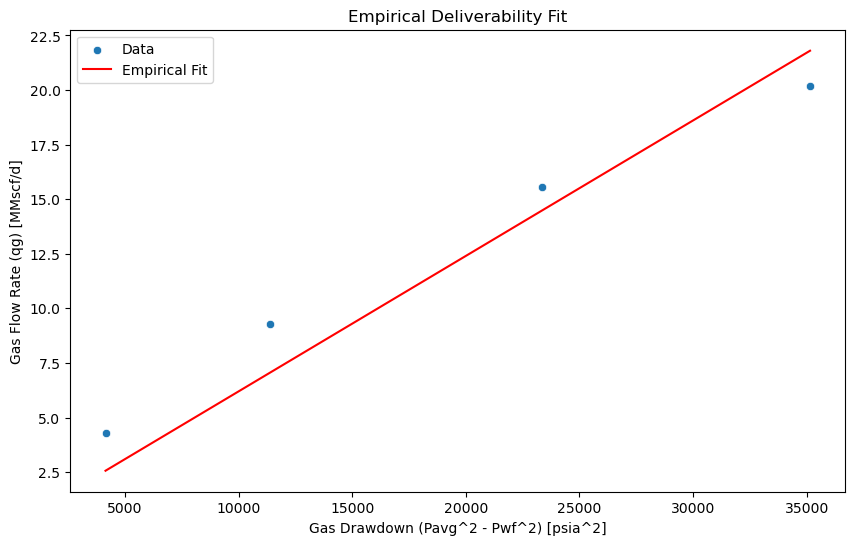

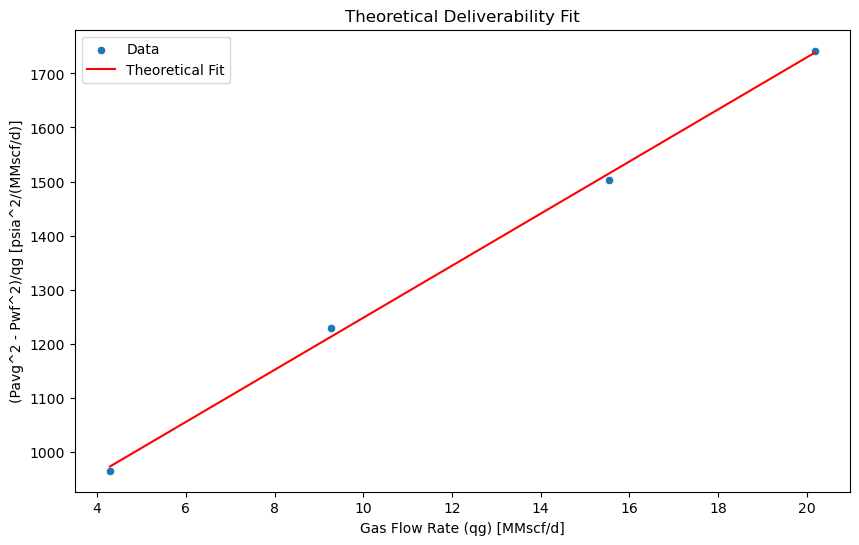

In [233]:
# Plot fit results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gas_drawdown, y=qg, label='Data')
x_fit = np.linspace(min(gas_drawdown), max(gas_drawdown), 100)
y_fit_empirical = empirical_deliverability(x_fit, C)
plt.plot(x_fit, y_fit_empirical, color='red', label='Empirical Fit')
plt.xlabel('Gas Drawdown (Pavg^2 - Pwf^2) [psia^2]')
plt.ylabel('Gas Flow Rate (qg) [MMscf/d]')
plt.title('Empirical Deliverability Fit')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=qg, y=gas_drawdown_over_qg, label='Data', ax=ax)
x_fit = np.linspace(min(qg), max(qg), 100)
y_fit_theoretical = theoretical_deliverability(x_fit, a, b)
ax.plot(x_fit, y_fit_theoretical, color='red', label='Theoretical Fit')
ax.set_xlabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_ylabel('(Pavg^2 - Pwf^2)/qg [psia^2/(MMscf/d)]')
ax.set_title('Theoretical Deliverability Fit')
ax.legend()
plt.show()



 Plot of Qg vs Pwf with empirical and theoretical curves

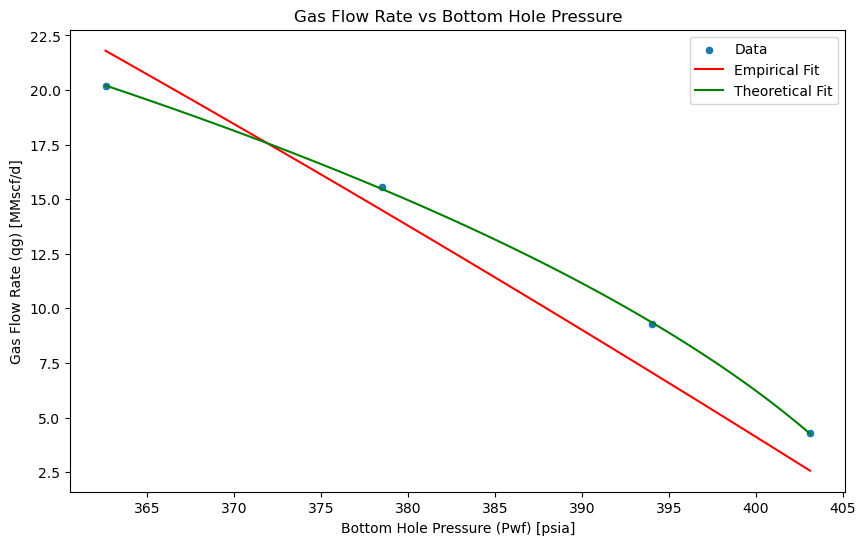

In [234]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=Test1_df,x='Pwf', y='qg', label='Data', ax=ax)

Pwf_fit = np.linspace(min(Test1_df['Pwf']), max(Test1_df['Pwf']), 100)
gas_drawdown_fit = Pavg**2 - Pwf_fit**2
qg_empirical_fit = qg_from_empirical_deliverability(gas_drawdown_fit, C)
qg_theoretical_fit = qg_from_theoretical_deliverability(gas_drawdown_fit, a, b)


ax.plot(Pwf_fit, qg_empirical_fit, color='red', label='Empirical Fit')
ax.plot(Pwf_fit, qg_theoretical_fit, color='green', label='Theoretical Fit')
ax.set_xlabel('Bottom Hole Pressure (Pwf) [psia]')
ax.set_ylabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_title('Gas Flow Rate vs Bottom Hole Pressure')
plt.legend()
plt.show()


 AOF:

In [235]:

AOF_from_empirical = qg_from_empirical_deliverability(Pavg**2, C)
AOF_from_theoretical = qg_from_theoretical_deliverability(Pavg**2, a, b)

print(f'Absolute Open Flow (AOF) from Empirical: {AOF_from_empirical:.4f} MMscf/d')
print(f'Absolute Open Flow (AOF) from Theoretical: {AOF_from_theoretical:.4f} MMscf/d')


Absolute Open Flow (AOF) from Empirical: 103.3391 MMscf/d
Absolute Open Flow (AOF) from Theoretical: 51.3977 MMscf/d


 ### Question 2

 Analyze AOF using the isochronal method.

 Define Table 2 data:

In [236]:
Duration = np.array([12, 12, 12, 12,72]) # hours
Pwf = np.array([1761,1694,1510,1320,1151]) # psia
qg = np.array([2.6,3.3,5.0,6.3,6.0]) # MMscf/d
Pavg = 1952 # psia
Test2_df = pd.DataFrame({'Duration': Duration, 'Pwf': Pwf, 'qg': qg})
Test2_df['Flow'] = 'Non-Stable'
Test2_df.loc[Test2_df['Duration'] >= 72, 'Flow'] = 'Stable'
print(Test2_df.head())

# Fit data with stable flow removed, because equations given assume laminar flow not PSS
Test2_fit_df = Test2_df[Test2_df['Flow'] != 'Stable']

gas_drawdown = Pavg**2 - Test2_fit_df['Pwf']**2

C_opt, _ = scipy.optimize.curve_fit(empirical_deliverability, gas_drawdown, Test2_fit_df['qg'])
C = C_opt[0]
print(f"Estimated deliverability constant (C): {C:.4f} MMscf/d/psia^2")

gas_drawdown_over_qg = (Pavg**2 - Test2_fit_df['Pwf']**2)/Test2_fit_df['qg']
b, a = np.polyfit(Test2_fit_df['qg'], gas_drawdown_over_qg, 1)
print("Theoretical Deliverability Params:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}") 


   Duration   Pwf   qg        Flow
0        12  1761  2.6  Non-Stable
1        12  1694  3.3  Non-Stable
2        12  1510  5.0  Non-Stable
3        12  1320  6.3  Non-Stable
4        72  1151  6.0      Stable
Estimated deliverability constant (C): 0.0000 MMscf/d/psia^2
Theoretical Deliverability Params:
a = 235443.1281
b = 14553.5244


 Plot fit results for isochronal test:

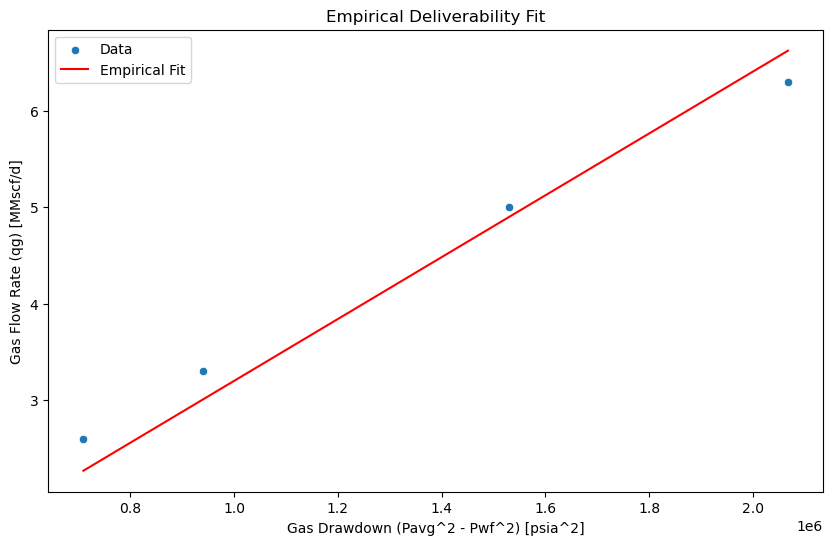

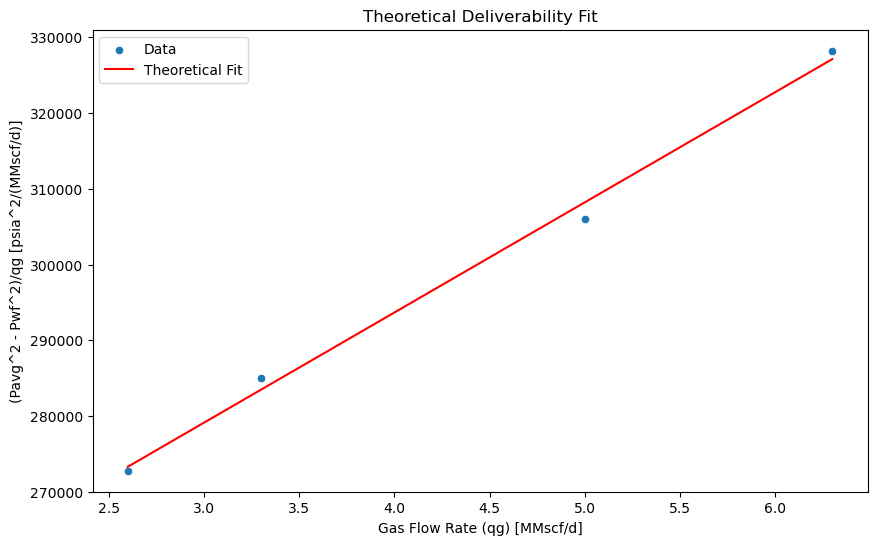

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gas_drawdown, y=Test2_fit_df['qg'], label='Data')
x_fit = np.linspace(min(gas_drawdown), max(gas_drawdown), 100)
y_fit_empirical = empirical_deliverability(x_fit, C)
plt.plot(x_fit, y_fit_empirical, color='red', label='Empirical Fit')
plt.xlabel('Gas Drawdown (Pavg^2 - Pwf^2) [psia^2]')
plt.ylabel('Gas Flow Rate (qg) [MMscf/d]')
plt.title('Empirical Deliverability Fit')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=Test2_fit_df['qg'], y=gas_drawdown_over_qg, label='Data', ax=ax)
x_fit = np.linspace(min(Test2_fit_df['qg']), max(Test2_fit_df['qg']), 100)
y_fit_theoretical = theoretical_deliverability(x_fit, a, b)
ax.plot(x_fit, y_fit_theoretical, color='red', label='Theoretical Fit')
ax.set_xlabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_ylabel('(Pavg^2 - Pwf^2)/qg [psia^2/(MMscf/d)]')
ax.set_title('Theoretical Deliverability Fit')
ax.legend()
plt.show()


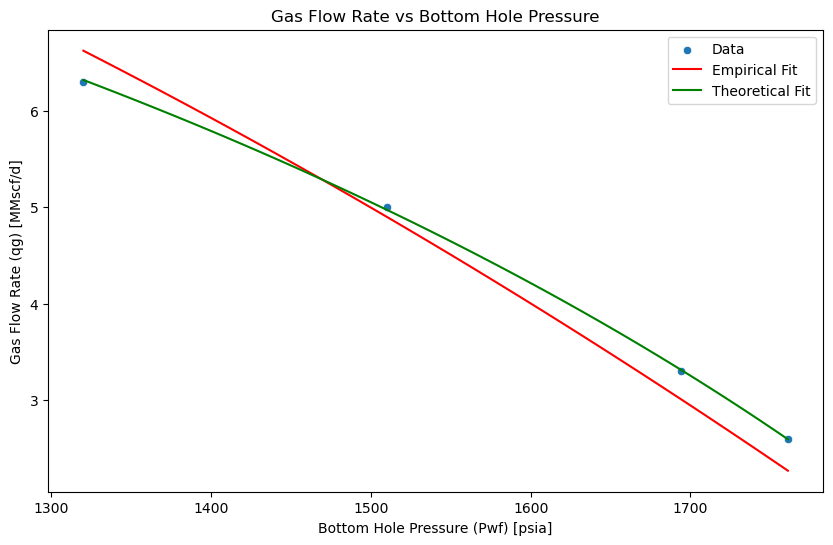

In [238]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=Test2_fit_df,x='Pwf', y='qg', label='Data', ax=ax)

Pwf_fit = np.linspace(min(Test2_fit_df['Pwf']), max(Test2_fit_df['Pwf']), 100)
gas_drawdown_fit = Pavg**2 - Pwf_fit**2
qg_empirical_fit = qg_from_empirical_deliverability(gas_drawdown_fit, C)
qg_theoretical_fit = qg_from_theoretical_deliverability(gas_drawdown_fit, a, b)


ax.plot(Pwf_fit, qg_empirical_fit, color='red', label='Empirical Fit')
ax.plot(Pwf_fit, qg_theoretical_fit, color='green', label='Theoretical Fit')
ax.set_xlabel('Bottom Hole Pressure (Pwf) [psia]')
ax.set_ylabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_title('Gas Flow Rate vs Bottom Hole Pressure')
plt.legend()
plt.show()


 AOF:

In [239]:

AOF_from_empirical = qg_from_empirical_deliverability(Pavg**2, C)
AOF_from_theoretical = qg_from_theoretical_deliverability(Pavg**2, a, b)

print(f'Absolute Open Flow (AOF) from Empirical: {AOF_from_empirical:.4f} MMscf/d')
print(f'Absolute Open Flow (AOF) from Theoretical: {AOF_from_theoretical:.4f} MMscf/d')


Absolute Open Flow (AOF) from Empirical: 12.1973 MMscf/d
Absolute Open Flow (AOF) from Theoretical: 10.0010 MMscf/d


 ### Question 3

 Analyze AOF using the modified isochronal method.

In [240]:
pavg = 1948
Duration = np.array([12, 12, 12, 12,81]) # hours
Ps = np.array([1948,1927,1911,1887,1887])
Pwf = np.array([1784,1680,1546,1355,1233]) # psia
qg = np.array([4.5,5.6,6.85,8.25,8.0]) # MMscf/d
Test3_df = pd.DataFrame({'Duration': Duration, 'Pwf': Pwf, 'qg': qg,'Pshutin Prior to Flow': Ps})
Test3_df['Flow'] = 'Non-Stable'
Test3_df.loc[Test3_df['Duration'] >= 72, 'Flow'] = 'Stable'

# Fit data with stable flow removed, because equations given assume laminar flow not PSS
Test3_fit_df = Test3_df[Test3_df['Flow'] != 'Stable']
Test3_fit_df.rename(columns={'Pshutin Prior to Flow': 'Ps'}, inplace=True)
Test3_df.head()

,Duration,Pwf,qg,Pshutin Prior to Flow,Flow
0,12,1784,4.50,1948,Non-Stable
1,12,1680,5.60,1927,Non-Stable
2,12,1546,6.85,1911,Non-Stable
3,12,1355,8.25,1887,Non-Stable
4,81,1233,8.00,1887,Stable


 Curve Fitting

In [241]:
gas_drawdown = pavg**2 - Test3_fit_df['Pwf']**2
# gas_drawdown = Test3_fit_df['Ps']**2 - Test3_fit_df['Pwf']**2
def empirical_deliverability_yint(drawdown, C,yint):
    return C * drawdown + yint

def qg_from_empirical_deliverability_yint(gas_drawdown, C, yint):
    """
    Calculate qg from gas drawdown using the empirical deliverability equation.
    
    Parameters
    ----------
    gas_drawdown : float or array-like
        Gas drawdown (Pavg^2 - Pwf^2)
    C : float
        Deliverability constant from empirical fit
    yint : float
        Y-intercept from empirical fit
    Returns
    -------
    qg : ndarray or float
        Gas flow rate corresponding to the given gas drawdown
    """
    return empirical_deliverability_yint(gas_drawdown, C, yint)

C, yint = np.polyfit(gas_drawdown, Test3_fit_df['qg'], 1)

print(f"Estimated deliverability constant (C): {C:.4f} MMscf/d/psia^2")
gas_drawdown_over_qg = (pavg**2 - Test3_fit_df['Pwf']**2)/Test3_fit_df['qg']
b, a = np.polyfit(Test3_fit_df['qg'], gas_drawdown_over_qg, 1)
print("Theoretical Deliverability Params:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")


Estimated deliverability constant (C): 0.0000 MMscf/d/psia^2
Theoretical Deliverability Params:
a = 19665.8370
b = 26723.7306


 Plot fit results for modified isochronal test:

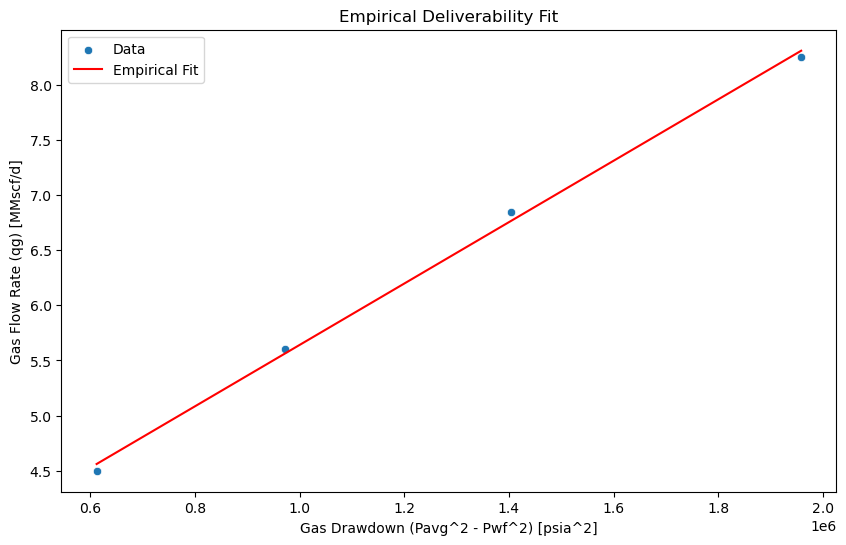

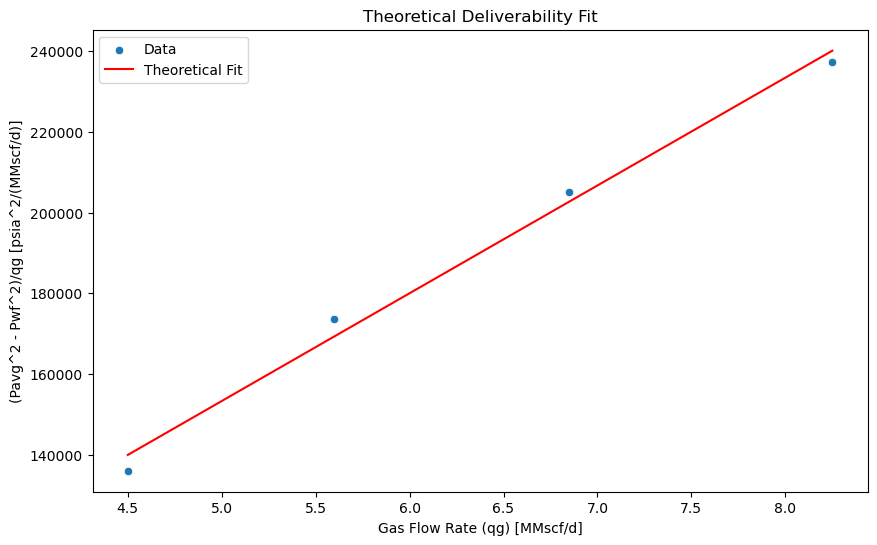

In [242]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=gas_drawdown, y=Test3_fit_df['qg'], label='Data')
x_fit = np.linspace(min(gas_drawdown), max(gas_drawdown), 100)
y_fit_empirical = empirical_deliverability_yint(x_fit, C,yint) 
plt.plot(x_fit, y_fit_empirical, color='red', label='Empirical Fit')
plt.xlabel('Gas Drawdown (Pavg^2 - Pwf^2) [psia^2]')
plt.ylabel('Gas Flow Rate (qg) [MMscf/d]')
plt.title('Empirical Deliverability Fit')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=Test3_fit_df['qg'], y=gas_drawdown_over_qg, label='Data', ax=ax)
x_fit = np.linspace(min(Test3_fit_df['qg']), max(Test3_fit_df['qg']), 100)
y_fit_theoretical = theoretical_deliverability(x_fit, a, b)
ax.plot(x_fit, y_fit_theoretical, color='red', label='Theoretical Fit')
ax.set_xlabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_ylabel('(Pavg^2 - Pwf^2)/qg [psia^2/(MMscf/d)]')
ax.set_title('Theoretical Deliverability Fit')
ax.legend()
plt.show()

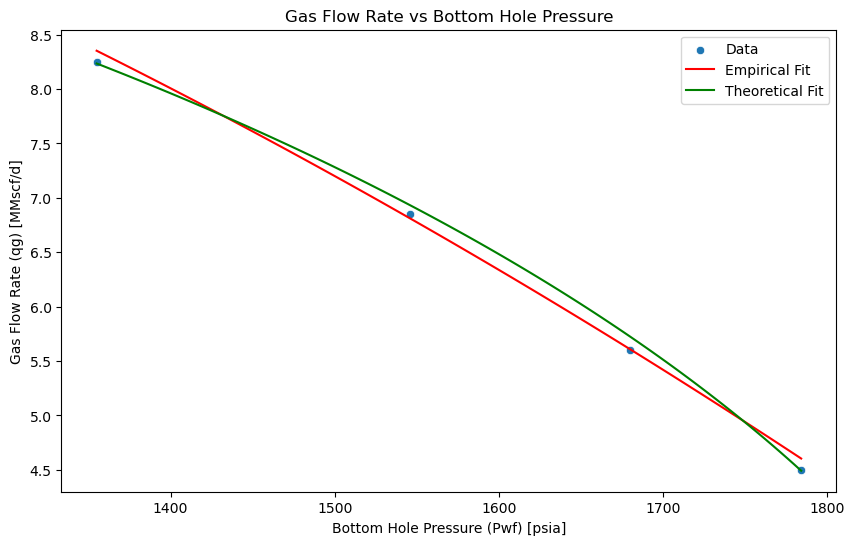

In [243]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=Test3_fit_df,x='Pwf', y='qg', label='Data', ax=ax)

Pwf_fit = np.linspace(min(Test3_fit_df['Pwf']), max(Test3_fit_df['Pwf']), 100)
gas_drawdown_fit = Pavg**2 - Pwf_fit**2
qg_empirical_fit = qg_from_empirical_deliverability_yint(gas_drawdown_fit, C,yint)
qg_theoretical_fit = qg_from_theoretical_deliverability(gas_drawdown_fit, a, b)


ax.plot(Pwf_fit, qg_empirical_fit, color='red', label='Empirical Fit')
ax.plot(Pwf_fit, qg_theoretical_fit, color='green', label='Theoretical Fit')
ax.set_xlabel('Bottom Hole Pressure (Pwf) [psia]')
ax.set_ylabel('Gas Flow Rate (qg) [MMscf/d]')
ax.set_title('Gas Flow Rate vs Bottom Hole Pressure')
plt.legend()
plt.show()


 AOF:

In [244]:

AOF_from_empirical = qg_from_empirical_deliverability_yint(Pavg**2, C, yint)
AOF_from_theoretical = qg_from_theoretical_deliverability(Pavg**2, a, b)

print(f'Absolute Open Flow (AOF) from Empirical: {AOF_from_empirical:.4f} MMscf/d')
print(f'Absolute Open Flow (AOF) from Theoretical: {AOF_from_theoretical:.4f} MMscf/d')

Absolute Open Flow (AOF) from Empirical: 13.4621 MMscf/d
Absolute Open Flow (AOF) from Theoretical: 11.5785 MMscf/d


### Question 4
Calculate the gas Pseudopressure m(p) for a reservoir containing 0.7 gravity gas at 200°F as a function of pressure in the range 150 to 3,150 psia.  Gas properties as functions of pressure are given in Table 4.

Define Table 4 below:

In [245]:
Table4_dict = {
    "P (psia)": [
        150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500,
        1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000, 3150
    ],
    "mu_g (cp)": [
        0.01238, 0.01254, 0.01274, 0.01303, 0.01329, 0.01360, 0.01387,
        0.01428, 0.01451, 0.01485, 0.01520, 0.01554, 0.01589, 0.01630,
        0.01676, 0.01721, 0.01767, 0.01813, 0.01862, 0.01911, 0.01961
    ],
    "z": [
        0.9856, 0.9717, 0.9582, 0.9453, 0.9332, 0.9218, 0.9112,
        0.9016, 0.8931, 0.8857, 0.8795, 0.8745, 0.8708, 0.8684,
        0.8671, 0.8671, 0.8683, 0.8705, 0.8738, 0.8780, 0.8830
    ],
    "P_over_mu_z (psia/cp)": [
        12290, 24620, 36860, 48710, 60470, 71790, 83080,
        93205, 104200, 114000, 123400, 132500, 140900, 148400,
        154800, 160800, 166200, 171100, 175200, 178800, 181900
    ]
}

Table4 = pd.DataFrame(Table4_dict)

Table4.head(21)

,P (psia),mu_g (cp),z,P_over_mu_z (psia/cp)
0,150,0.01238,0.9856,12290
1,300,0.01254,0.9717,24620
2,450,0.01274,0.9582,36860
3,600,0.01303,0.9453,48710
4,750,0.01329,0.9332,60470
5,900,0.01360,0.9218,71790
6,1050,0.01387,0.9112,83080
7,1200,0.01428,0.9016,93205
8,1350,0.01451,0.8931,104200
9,1500,0.01485,0.8857,114000


In [246]:
Table4['Delta P'] = Table4['P (psia)'].diff().fillna(0)
Table4.head()

,P (psia),mu_g (cp),z,P_over_mu_z (psia/cp),Delta P
0,150,0.01238,0.9856,12290,0.0
1,300,0.01254,0.9717,24620,150.0
2,450,0.01274,0.9582,36860,150.0
3,600,0.01303,0.9453,48710,150.0
4,750,0.01329,0.9332,60470,150.0


In [247]:
Table4['2 *P_over_mu_z'] = 2 * Table4['P_over_mu_z (psia/cp)']
Table4['Avg 2P/Muz'] = (
    Table4['2 *P_over_mu_z'] + 
    Table4['2 *P_over_mu_z'].shift(1)
) / 2
Table4.loc[0, 'Avg 2P/Muz'] = Table4.loc[0, '2 *P_over_mu_z']
Table4.head()

,P (psia),mu_g (cp),z,P_over_mu_z (psia/cp),Delta P,2 *P_over_mu_z,Avg 2P/Muz
0,150,0.01238,0.9856,12290,0.0,24580,24580.0
1,300,0.01254,0.9717,24620,150.0,49240,36910.0
2,450,0.01274,0.9582,36860,150.0,73720,61480.0
3,600,0.01303,0.9453,48710,150.0,97420,85570.0
4,750,0.01329,0.9332,60470,150.0,120940,109180.0


In [248]:
Table4['Avg 2P/Muz * Delta P'] = Table4['Avg 2P/Muz'] * Table4['Delta P']
Table4.head()

,P (psia),mu_g (cp),z,P_over_mu_z (psia/cp),Delta P,2 *P_over_mu_z,Avg 2P/Muz,Avg 2P/Muz * Delta P
0,150,0.01238,0.9856,12290,0.0,24580,24580.0,0.0
1,300,0.01254,0.9717,24620,150.0,49240,36910.0,5536500.0
2,450,0.01274,0.9582,36860,150.0,73720,61480.0,9222000.0
3,600,0.01303,0.9453,48710,150.0,97420,85570.0,12835500.0
4,750,0.01329,0.9332,60470,150.0,120940,109180.0,16377000.0


Final Table 4 with calculated M(p)

In [249]:
Table4['M(p) psia^2/cp'] = Table4['Avg 2P/Muz * Delta P'].cumsum()
Table4['M(p) MMpsia^2/cp'] = Table4['M(p) psia^2/cp'] / 1e6
Table4.head(21)

,P (psia),mu_g (cp),z,P_over_mu_z (psia/cp),Delta P,2 *P_over_mu_z,Avg 2P/Muz,Avg 2P/Muz * Delta P,M(p) psia^2/cp,M(p) MMpsia^2/cp
0,150,0.01238,0.9856,12290,0.0,24580,24580.0,0.0,0.0,0.00000
1,300,0.01254,0.9717,24620,150.0,49240,36910.0,5536500.0,5536500.0,5.53650
2,450,0.01274,0.9582,36860,150.0,73720,61480.0,9222000.0,14758500.0,14.75850
3,600,0.01303,0.9453,48710,150.0,97420,85570.0,12835500.0,27594000.0,27.59400
4,750,0.01329,0.9332,60470,150.0,120940,109180.0,16377000.0,43971000.0,43.97100
5,900,0.01360,0.9218,71790,150.0,143580,132260.0,19839000.0,63810000.0,63.81000
6,1050,0.01387,0.9112,83080,150.0,166160,154870.0,23230500.0,87040500.0,87.04050
7,1200,0.01428,0.9016,93205,150.0,186410,176285.0,26442750.0,113483250.0,113.48325
8,1350,0.01451,0.8931,104200,150.0,208400,197405.0,29610750.0,143094000.0,143.09400
9,1500,0.01485,0.8857,114000,150.0,228000,218200.0,32730000.0,175824000.0,175.82400


### Question 5	
Analysis of gas Well Drawdown Test Using Pseudopressures

Property Definition:

In [250]:
Pi = 3000 # psia
phi = 0.19
Swi = 0.211
Vw = 286 # ft^3
h = 10 # ft
T_f = 200 # F
Rw = 0.365 # ft
mui = 0.01911 # cp 
qg = 1000 # Mscf/d
gamma_g = 0.7
Cti = 0.235E-3 # psi^-1
drainage_area = 640 # acres

table5 = pd.DataFrame({
    "t_hours": [
        0, 0.024, 0.096, 0.244, 0.686, 2.015, 6.00, 17.96,
        53.82, 161.0, 281.0, 401.0, 521, 641, 761, 881
    ],
    "p_wf_psia": [
        3000, 2964, 2920, 2890, 2860, 2848, 2833, 2817,
        2802, 2786, 2777, 2771, 2766, 2763, 2760, 2757
    ],
    "Mpwf_psia2_per_cp": [
        6.338e8, 6.210e8, 6.055e8, 5.947e8, 5.864e8, 5.801e8,
        5.747e8, 5.693e8, 5.640e8, 5.585e8, 5.553e8, 5.532e8,
        5.517e8, 5.505e8, 5.494e8, 5.485e8
    ]
})

table5.head()

,t_hours,p_wf_psia,Mpwf_psia2_per_cp
0,0.000,3000,633800000.0
1,0.024,2964,621000000.0
2,0.096,2920,605500000.0
3,0.244,2890,594700000.0
4,0.686,2860,586400000.0


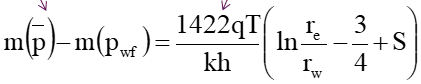



Find k and S:
- compute necessary variable/conversions
- compute coefs from known variables

/opt/conda/envs/Code/lib/python3.14/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


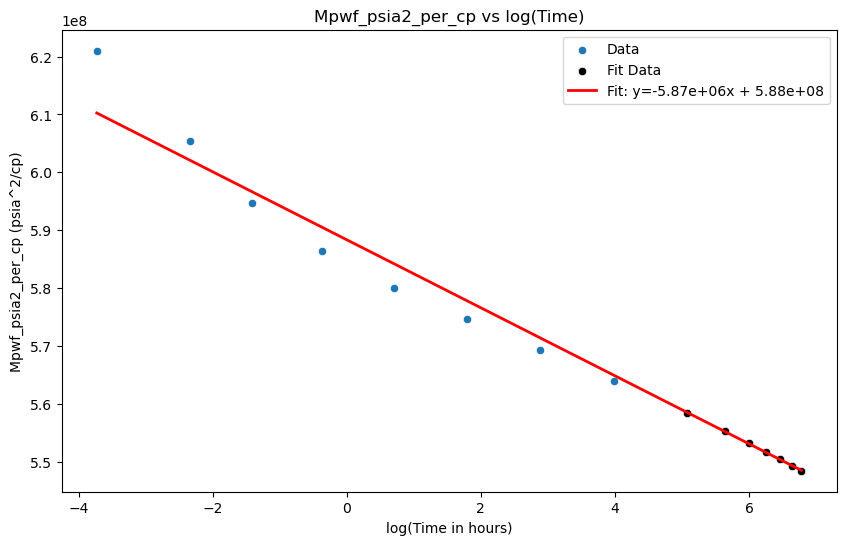

In [251]:
def re_from_drainage_area(drainage_area_acres):
    """
    Calculate the effective radius of a circular drainage area.
    
    Parameters
    ----------
    drainage_area_acres : float
        Drainage area in acres
    
    Returns
    -------
    re : float
        Effective radius in feet
    """
    # Convert acres to square feet (1 acre = 43,560 ft^2)
    drainage_area_ft2 = drainage_area_acres * 43560
    # Calculate the radius of a circle with the given area: A = π * r^2 => r = sqrt(A/π)
    re = np.sqrt(drainage_area_ft2 / np.pi)
    return re

def farenheit_to_rankine(temp_f):
    """
    Convert temperature from Fahrenheit to Rankine.
    
    Parameters
    ----------
    temp_f : float or array-like
        Temperature in degrees Fahrenheit
    
    Returns
    -------
    temp_r : float or array-like
        Temperature in degrees Rankine
    """
    return temp_f + 459.67
T_rankine = farenheit_to_rankine(T_f)
re = re_from_drainage_area(drainage_area)

M_avgP = table5.loc[0, 'Mpwf_psia2_per_cp']
table5['M_avgP_minus_M_pwf'] = M_avgP - table5['Mpwf_psia2_per_cp']
table5['logt'] = np.log(table5['t_hours'])
table5 = table5[table5['t_hours'] > 0]  # Remove t=0 row to avoid log(0)

# col_to_fit = 'M_avgP_minus_M_pwf'
col_to_fit = 'Mpwf_psia2_per_cp'

# Plot M_avgP - M_pwf vs log(t)
fig,ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x='logt',
    y=col_to_fit,
    data=table5.loc[np.isfinite(table5['logt'])],
    ax=ax,
    label='Data'
)
ax.set_xlabel('log(Time in hours)')

# np linear regression (ignore t=0 row where logt = -inf)
fit_mask = table5['logt'] > 4 
x_fit = table5.loc[fit_mask, 'logt']
y_fit = table5.loc[fit_mask, col_to_fit]

sns.scatterplot(x=x_fit, y=y_fit, ax=ax, color='k', label='Fit Data')

slope, intercept = np.polyfit(x_fit, y_fit, 1)
x_line = np.linspace(table5['logt'].min(), table5['logt'].max(), 200)
y_line = slope * x_line + intercept

# add regression line on the same plot
ax.plot(
    x_line,
    y_line,
    color='red',
    lw=2,
    label=f'Fit: y={slope:.2e}x + {intercept:.2e}'
)
ax.legend()
ax.set_ylabel(f'{col_to_fit} (psia^2/cp)')
ax.set_title(f'{col_to_fit} vs log(Time)')
plt.show()


In [252]:
# slope = - 1637*qg*T/kh 
# k = - 1637*qg*T/ h /slope
k_est = - 1637 * qg * T_rankine / h / slope
print(f"Estimated permeability (k): {k_est:.4f} md")

Mpwf_1hr = intercept 
# S = 1.1513 * ( (Mpwf_1hr - Mpi)/(- * 16377 * qg * T_rankine / k / h) - log(k/phi/mui/cti/rw**2) + 3.23 )
S_est = 1.1513 * ( (Mpwf_1hr - M_avgP)/(- 1637 * qg * T_rankine / k_est / h) - np.log(k_est/(phi*mui*Cti*Rw**2)) + 3.23 )
print(f"Estimated skin factor (S): {S_est:.4f}")

Estimated permeability (k): 18.4014 md
Estimated skin factor (S): -9.1299
